In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/data_digits.csv')
Y = data['label']
X = data.drop('label', axis = 1)
print(np.shape(X), np.shape(Y))
#Este dataset contienen imágenes en escala de grises de dígitos dibujados a mano, de cero a nueve.
#Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles en total. 
#Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, 
#con números más altos que significan más oscuro. Este valor de píxel es un número entero entre 0 y 255.
#El dataset tiene 785 columnas. La primera columna, llamada "label", es el dígito que dibujó el usuario. 
#El resto de las columnas contienen los valores de píxeles de la imagen asociada.
#n_imagenes = len(X)
#imagenes = np.array(X).astype('float32')
#imagenes = imagenes.reshape((n_imagenes, 28, 28))
#plt.figure()
#plt.imshow(imagenes[200].reshape(28, 28))
#plt.colorbar()
#plt.grid(False)

(4200, 785) (4200,)


In [3]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.5)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
c = np.logspace(-3,2,num=10)
score_l1 = []
for i in c:
    clf = LogisticRegression(C=i,penalty='l1',solver='saga')
    clf.fit(x_train, y_train)
    score_l1.append(clf.score(x_test, y_test))

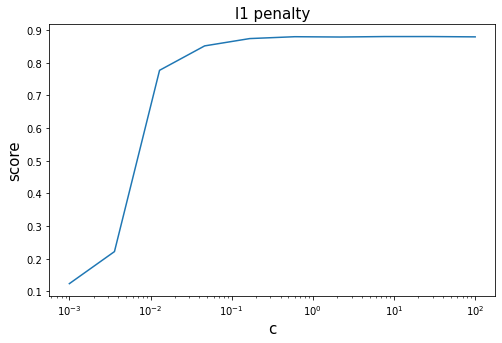

In [5]:
plt.figure(figsize=(8,5))
plt.semilogx(c, score_l1)
plt.title('l1 penalty',fontsize=15)
plt.xlabel('c',fontsize=15)
plt.ylabel('score',fontsize=15)
plt.show()

In [21]:
#De acuerdo a la gráfica anterior, se seleccionó un valor de C para el cuál el score se estabiliza
C1 = 1.66810054e-01
clf1 = LogisticRegression(C = C1, penalty = 'l1',solver = 'saga')
clf1.fit(x_train, y_train)

LogisticRegression(C=0.166810054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
c = np.logspace(-3,2,num=10)
score_l2 = []
for i in c:
    clf = LogisticRegression(C=i,penalty='l2',solver='saga')
    clf.fit(x_train, y_train)
    score_l2.append(clf.score(x_test, y_test))

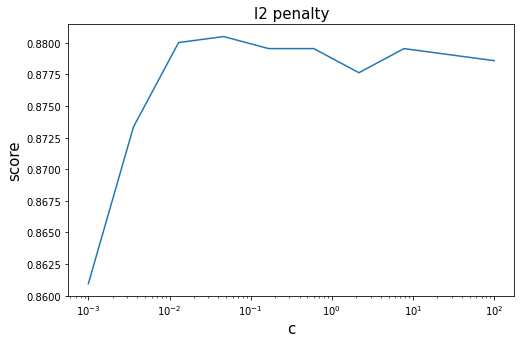

In [17]:
plt.figure(figsize=(8,5))
plt.semilogx(c, score_l2)
plt.title('l2 penalty',fontsize=15)
plt.xlabel('c',fontsize=15)
plt.ylabel('score',fontsize=15)
#plt.xscale("log")
plt.show()

In [22]:
#De acuerdo a la gráfica anterior, se seleccionó un valor de C para el cuál el score tiende a estabilizarse
C2 = 5.99484250e-01
clf2 = LogisticRegression(C = C2, penalty = 'l2',solver = 'saga')
clf2.fit(x_train, y_train)

LogisticRegression(C=0.59948425, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

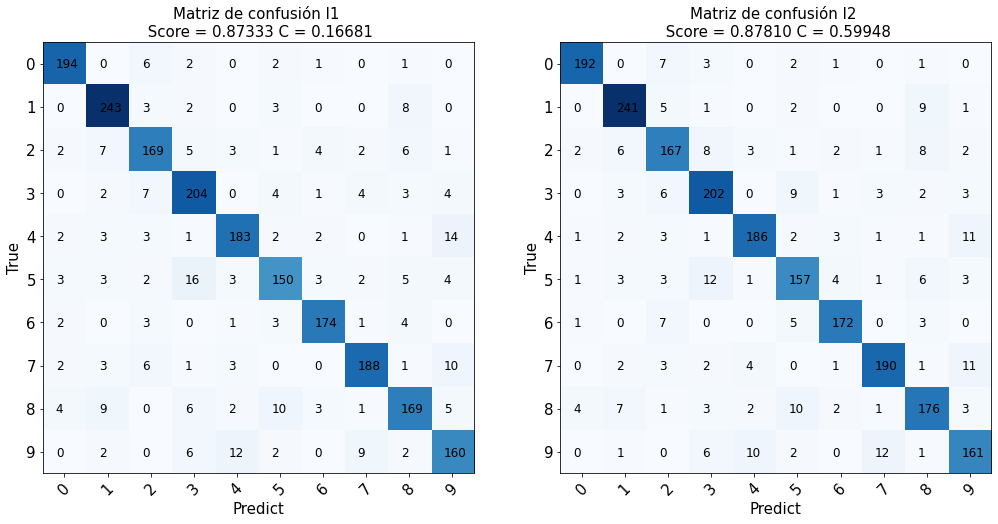

In [32]:
plt.figure(figsize=(17,17))

plt.subplot(1,2,1)
cml1 = confusion_matrix(y_test, clf1.predict(x_test))
plt.imshow(cml1, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['0','1','2','3','4','5','6','7','8','9']
plt.title('Matriz de confusión l1 \n Score = {:.5f} C = {:.5f}'.format(clf1.score(x_test, y_test),C1),fontsize=15)
plt.ylabel('True',fontsize=15)
plt.xlabel('Predict',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45,fontsize=15)
plt.yticks(tick_marks, classNames, fontsize=15)
for i in range(10):
    for j in range(10):
        plt.text(j-0.2, i+0.1, str(cml1[i][j]),fontsize=12)
#plt.savefig('confusion.png')

plt.subplot(1,2,2)
cml2 = confusion_matrix(y_test, clf2.predict(x_test))
plt.imshow(cml2, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['0','1','2','3','4','5','6','7','8','9']
plt.title('Matriz de confusión l2 \n Score = {:.5f} C = {:.5f}'.format(clf2.score(x_test, y_test),C2),fontsize=15)
plt.ylabel('True',fontsize=15)
plt.xlabel('Predict',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45,fontsize=15)
plt.yticks(tick_marks, classNames, fontsize=15)
for i in range(10):
    for j in range(10):
        plt.text(j-0.2, i+0.1, str(cml2[i][j]),fontsize=12)
#plt.savefig('confusion.png')
plt.show()

In [ ]:
#Para ambas penalidades l1 y l2 el valor de C para score estable difiere, sin embargo, para el C seleccionado
#el score es muy similar, tal como se ve en la matriz de confusión de cada penalidad.